# Arbres de décision

## Comment construit-on un arbre de décision ?
Le principal algorithme utilisé pour l’apprentissage d’arbres et l’algorithme CART (*Classification And Regression Tree*). Cet algorithme permet d’apprendre aussi bien des arbres de classification que des arbres de régression. 
1. Pour chaque nœud de l’arbre et si le critère d’arrêt n’y est pas rempli, on cherche la variable et le seuil permettant de séparer le plus efficacement possible la population du nœud courant (gain d’information maximal), le critère d’information étant différent en régression (MSE, MAE) et en classification (Gini, entropie). La *feature* (on utilise le plus souvent qu’une *feature*) utilisée pour le split est celle apportant la plus grande amélioration du critère de split.
2. On répète 1. sur les deux nœuds-fils obtenus.

Remarque: Le gain sur le critère de split est mesuré par:
$$gain=criterion_{current node} - (\frac{N_{left\:child}}{N_{current node}}criterion_{left\:child}+\frac{N_{right\:child}}{N_{current node}}criterion_{right\:child})$$

L'ensemble pouvant être remultiplié (comme dans `sklearn`) par $\frac{N_{current\:node}}{N_{total}}$ afin de pouvoir être sommé sur différents noeuds pour calculer une *feature importance* par exemple.

Lorsqu’une observation est classée dans une feuille donnée :
* En régression, la valeur retournée correspondra à la moyenne des valeurs de $y$ pour les observations du *training set* ayant été groupés dans cette feuille à l’entrainement (on montre que c’est pour la moyenne que l’erreur est minimisée au sein de chaque feuille). On remarque qu’autoriser des feuilles à très peu de membre à l’entrainement peut contribuer à une variance élevée en prédiction. Corolaire : imposer une taille minimale de feuille à l’entrainement a un *smoothing effect*.
* En classification, le label retourné sera celui le plus représenté parmi ceux des observations du *training set* ayant été groupés dans cette feuille à l’entrainement.

## Quels algorithmes de construction d’arbre connaissez-vous ? 
L’algorithme CART est le plus utilisé et est notamment implémenté dans `sklearn`. Un autre algorithme connu est le C4.5/C5.

## Quels sont les principaux inconvénients des arbres de décision ? Que peut-on faire pour palier à ces inconvénients ?
Le premier inconvénient des arbres est qu’ils sont assez prompts à *overfitter* les données. Le risque est d’autant plus grand lorsque notre nombre d’observations n’est pas beaucoup plus élevé que le nombre de *features*. Plusieurs méthodes sont disponibles pour régulariser l’apprentissage d’un arbre :
* On peut jouer sur le critère d’arrêt. On peut ainsi subordonner le *split* d’un nœud à un ou plusieurs critères : 
     * Nombre minimal d’observations pour *splitter* le nœud, 
     * Nombre minimal d’observations pour constituer une feuille terminale, 
     * Profondeur maximale, 
     * Nombre maximal de feuilles terminales,
     * Amélioration minimale du critère de *split* (A utiliser avec prudence, l'algorithme étant *greedy*, il est de ce fait myope : un *split* relativement médiocre avec une faible amélioration du critère peut être suivi de *splits* très intéressants).
* On peut laisser l’arbre croitre au maximum et l’élaguer (*prune*) à postériori (*post-pruning*). Plusieurs stratégies sont possibles, toutes ont l'avantage d'être puissamment régularisantes mais au prix d'un temps de calcul plus élevé. L’élagage va consister à trouver l’arbre réalisant le meilleur compromis entre minimisation d’un critère d’information (MSE, etc.) et complexité de l’arbre (ex : son nombre total de noeuds). Voir *cost-complexity pruning*. Le *post-pruning* (en l'espèce le *minimal cost-complexity pruning*) n’est supporté par `scikit-learn` que depuis sa version 0.22.

Remarque: On parle pour les premières méthodes de *pre-pruning* (par opposition à un *pruning* qui a lieu après la croissance de l'arbre) ou d'*early stopping*. Ces dernière visant à ce que l'arbre ne devienne pas spontannément trop gros.

Dans les deux cas, le choix du ou des meilleurs paramètres de régularisation et de l’arbre associé se fait par *cross-validation* (dans le second cas, il s’agit du paramètre donnant une plus ou moins grande importance à la complexité du modèle). 

Dans le cas d’un problème de haute dimension, on peut faire précéder l’entrainement d’une étape de réduction de dimension (PCA, *feature sélection*, etc.).

Un second inconvénient est que de par (le caractère hiérarchique de) l’algorithme les construisant, les arbres sont très sensibles aux variations des données (une erreur, un changement au niveau d’un nœud se propage à tous les nœuds suivants) et donc instables : de petites différences dans le *training set* peuvent conduire à un ensemble de *splits* / à des arbres très différents. Ce problème peut être atténué par l’utilisation de multiples arbres dans une méthode d’ensemble (le *bagging* moyenne différents arbres et atténue cette source de variance). Cette proprité est même exploité par le *bagging* pour décorréler les différents modèles.

Un troisième inconvénient des arbres utilisés seuls est qu’ils sont limités dans la complexité qu’ils peuvent apprendre: ne *splitter* que sur une seule variable à la fois implique qu'on ne fractionne l'espace des *features* que parallèlement aux axes. Certaines fonctions ou concepts leurs sont très difficiles à apprendre. Pour certaines fonctions ils apparaissent largement sous-optimaux (ex : frontière de décision à 45°). Là encore, leur utilisation dans des méthodes d’ensemble mène à de bien meilleurs résultats.

Un quatrième inconvénient est qu’en présence d’une classe majoritaire dans le dataset, les arbres de classification sont biaisés en faveur de la classe majoritaire. C’est un problème plus large qui n’affecte pas que les arbres de décision. Dans leur cas cela provient du fait que les critères de Gini / d’entropie sont maximums si un nœud présente une distribution équilibrée. Plusieurs solutions s'offrent à nous:
* Pondérer les observations suivant leur classe pour se ramener au cas équilibré.
* Rééquilibrer le dataset par *up-* ou *downsampling* de la classe minoritaire ou majoritaire respectivement avant de lancer l’apprentissage.
* Adapter ses métriques de performance (*balanced accuracy*, etc.)

On peut ajouter que les surfaces de prédiction (régression) / les frontières de décision (classification) sont très irrégulières (*lack of smoothness*), ce qui peut être un problème notamment en régression où on cherche le plus souvent à approcher des fonctions relativement régulières. 

## Quels sont les principaux avantages des arbres de décision ?
Le principal avantage des arbres de décision est qu’ils sont particulièrement transparents, la prédiction est facile à comprendre. C’est le modèle offrant la plus grande explicabilité au métier (d’autant qu’ils peuvent s’interpréter comme un exemple de règle métiers) bien qu’un arbre profond puisse devenir plus difficile à interpréter. On peut nuancer davantage : en cas de multicolinéarité, commenter le choix de features fait à la construction de l’arbre (par exemple pour en dériver des règles métier) est plus délicat puisque pour deux features colinéaires, chacune peut arbitrairement être choisie par l’arbre pour l’information qu’elle apporte. L’application d’une PCA avant entrainement peut répondre à ce problème, toutefois les nouvelles features obtenues souffrent souvent d’être difficilement interprétables.

Le second avantage des arbres de décision est qu’ils demandent peu de préprocessing des données d’entrée. En particulier, ils n’exigent pas que les données soient normalisées. 

Un troisième avantage des arbres de décision est qu’ils supportent les données mixtes. Le *split* se base sur une mesure d’impureté dans les branches qu’il crée et non sur les valeurs de la variable. Le *split* sur une variable catégorielle prendrait la forme de l’appartenance à certaines classes. Le split sur une variable continue prendrait la forme d’un seuil. Tout du moins en théorie : l’implémentation des arbres de décision de `sklearn` ne supporte que les données continues obligeant à encoder nos variables catégorielles.

On peut ajouter qu’ils sont également relativement peu sensibles aux outliers. 

## Quelle est la complexité de la construction d’un arbre ? 
Soit $n$ le nombre d’observations du *training set* et $p$ le nombre de *features*, le coût de la construction d’un arbre se situe entre $O(p.n.log(n))$ et $O(p².n.log(n))$. 

Voir par exemple [ce lien](https://scikit-learn.org/stable/modules/tree.html#complexity).

## Quels critères de split connaissez-vous ? Pouvez-vous expliquer brièvement chacun d’entre eux ?

### Qu'est-ce qu'un critère de split ?
En régression comme en classification, un split se décide sur la base d'une variation de critère de split. Cette variation correspond à la différence entre la somme des valeurs prises par le critère de split sur les deux noeuds issus du split moins sa valeur prise sur le noeud courant. Un split avantageux est un split pour lequel cette différence est positive.

En régression, les critères de split les plus communément utilisés sont la MSE et la MAE. Une variation de critère de split s'interprète aisément commme une variation de *loss*.

En classification, les critères de Gini et l'entropie sont les plus utilisés. Une variation de critère de split est souvent interprétée comme "gain d'information" (*information gain*). Les critères utilisés cherchent tous à rendre compte de la notion de pureté d'un noeud. Plus un noeud est pur, plus sa composition est homogène. Un noeud parfaitement pur ne contient que des éléments d'une même classe.

### Critères de split en classification
Soit $p_k$ la proportion d'observations appartenant à la classe $k$ pour le noeud considéré:
* Critère de Gini: $\sum_{k \neq k'}p_{k}p_{k'} = \sum_{k}p_{k}(1-p_{k}) = 1 - \sum_{k}p_{k}^2$
* Entropie: $-\sum_{k}p_{k}log(p_{k})$

Remarque: Le choix du critère de *split* peut être vu comme un hyperparamère du modèle, celui-ci étant toutefois rarement déterminant.

On peut montrer que pour $N_c$ le nombre de classes dans le dataset, ces deux critères sont maximums lorsque les proportions de chaque classe sont de $1/N_c$. Ainsi, ces critères tels que définis **font implicitement l'hypothèse d'un *dataset* équilibré** et favorisent tout *split* dont la résultante s'éloigne de cette distribution équilibrée.

On peut pour chacun de ces critères, donner une interprétation illustrant leur pertinence pour rendre compte de la pureté d'un noeud. 

#### Critère de Gini
Si on fait l'expérience dans laquelle on va associer une classe à une observation, la classe suivant une loi catégorielle (multinoulli) et la probabilité $p_k$ de chaque classe $k$ étant prise égale à la proportion d'observations du noeud en faisant partie ; alors on montre que la probabilité d'assigner incorrectement l'observation à sa classe réelle correspond à la définition du critère de Gini. 

En effet:

$$
\begin{aligned}
P(incorrect\ assignment) &= \bigcup_k P(incorrectly\ assigned\ to\ class\ k) \\
&= \bigcup_k P(assigned\ to\ class\ k \cap not\ belonging\ to\ class\ k) \\
&= \bigcup_k P(assigned\ to\ class\ k).P(not\ belonging\ to\ class\ k) \\
&= \sum_k P(assigned\ to\ class\ k).P(not\ belonging\ to\ class\ k) \\
&= \sum_k p_k.(1 - p_k) \\
\end{aligned}
$$

On montre par ailleurs que cette quantité est maximale si $p_k=p=1/N_c$. Cela correspond effectivement à l'intuition: plus les classes sont équiprobables, plus on a de chances de se tromper. A l'inverse s'éloigner fortement du cas équiprobable correspond à la présence d'une ou plusieurs classes dominantes voire d'une classe unique (proportion de la classe dans le noeud proche de 1), la probabilité de se tromper est forcément plus faible (on a de fortes chances de tirer la bonne classe) voire nulle. Cette définition rend donc adéquatement compte de la notion de pureté.

#### Entropie
L'entropie (dite de Shannon et souvent notée $H$) est un concept provenant de la théorie de l'information et qu'on peut dans notre contexte grossièrement résumer à une quantification de l'incertitude associée à une distribution, à une variable aléatoire. Par exemple dans le cas d'une variable discrète, si la valeur du prochain tirage est relativement certain (une valeur présente une probabilité très élevée), alors l'incertitude associée à la distribution est relativement faible. Réciproquement, on comprend déjà pourquoi le cas où toutes les valeurs sont équiprobables correspond au cas d'incertitude et donc d'entropie le plus élevé. Là encore on a trouvé une grandeur à la fois maximale dans le cas équiprobable et nulle dans le cas d'une classe unique et donc rendant adéquatement compte de la notion de pureté. 

Dans le contexte des critères de split, la distribution dont l'entropie correspondrait à celle de la définition donnée plus haut est la même que celle de l'exemple d'interprétation du critère de Gini: celle d'une loi catégorielle (multinoulli) dont chaque probabilité $p_k$ est prise égale à la étant prise égale à la proportion d'observations du noeud faisant partie de la classe $k$. En d'autres termes, les critères de split utilisés en classification sont simplement deux quantités dérivées de cette distribution de probabilité et dont chacune permet de rendre compte de la notion de pureté.

Quelques remarques sur l'entropie: 
* Dans le contexte de la théorie de l'information, le $log$ est un $log_2$ ($log_2(2)=1$) et l'entropie a une unité, elle s'exprime en "bits (d'information)".
* L'entropie est une propriété de la distribution et est indépendante des valeurs prises par la variable aléatoire, i.e. du domaine $\mathcal{X}$ dans lequel elle prend ses valeurs.
* $H(P)=-\sum_{x \in \mathcal{X}}p(x)log(p(x))=-\mathbb{E}_p[log(p(x))]$

Voir notamment les vidéos:
* https://youtu.be/0GCGaw0QOhA
* https://youtu.be/8bDP364v8Gc et https://youtu.be/8bDP364v8Gc et https://youtu.be/ByA_TBfMZe4

#### Et le *missclassification rate* ?
On pourrait aussi utiliser le *missclassification rate* qui correspond à la proportion des observations non assignées à la classe majoritaire du noeud courant. Celui-ci a notamment deux désavantages comparées aux deux autres critères: 
* Il n'est pas différentiable (problèmes de calcul numérique).
* Surtout, il ne favorise pas la pureté: (400, 400) divisé en (100, 300) et (300, 100) d'une part et (200, 400) et (200, 0) ont le même *missclassification rate*.

### *Datasets* déséquilibrés et pondération des critères de *split*
On a vu ci-dessus que les critères de *split* font implicitement l'hypothèse de données équilibrée ce qui appliqué à un *dataset* où ce n'est pas le cas peut finir par biaiser l'apprentissage. 

Une solution pourrait être de pénaliser différemment une erreur de classification suivant la classe de l'observation à classifier. Le critère de Gini (qui s'interprète d'ailleurs comme une *training error*) prendrait alors la forme $\sum_{k \neq k'}L_{kk'}p_{k}p_{k'}$ avec $L_{ii}=0$ et $L_{ij}$ la pénalité associée à l'assignation erronée à la classe $j$ d'une observation de la classe $i$.

Dans `sklearn` l'argument dédié à la gestion de *datasets* déséquilibrés est `class_weight`. La logique est de pondérer les observations suivant leur appartenance à une classe: toutes les observations d'une même classe sont pondérées avec le même poids. En particulier, dans `class_weight='balanced'`, les poids sont choisis de façon à ce que les effectifs pondérés de chaque classe soient identiques et égaux à $n/N_c$ avec $N_c$ le nombre de classes et `n` le nombre total d'observations. L'option `class_weight='balanced'` recherche des effectifs pondérés équilibrés. En notant $n_k$ l'effectif de la classe $k$, $w_{i,k}$ le poid de la $i^e$ observation de la classe $k$ et en remarquant que pour tout $i$, $w_{i,k} = w_{k}$ puisque toutes les observations d'une même classe se voient assignées le même poids, on a:

$$\sum_{i=1}^{n_k}w_{i,k} = n_{k}.w_{k} = \frac{n}{N_c}$$

D'où l'expression du poids $w_k$ affecté à chaque observation de la classe $k$:

$$w_{k} = \frac{n}{n_{k}.N_c} = \frac{p_k}{N_c}$$

Avec $p_k=n_{k}/n$ la proportion d'observations de la classe $k$ dans l'effectif global. Cette équation correspond à l'expression `n_samples / (n_classes * np.bincount(y))` disponible dans la documentation.

Remarque: L'utilisateur peut aussi librement choisir la pondération qu'il souhaite appliquer à l'aide de l'argument `class_weight` du modèle. 

Cette méthode a aussi l'avantage de pouvoir ajouter facilement à cette pondération par classe une pondération plus fine s'appliquant à chaque observation individuellement (argument `sample_weight` des méthodes `fit`).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.tree

In [2]:
RANDOM_STATE=42

data = pd.DataFrame(data={
    'feat1': [1.1, 1.2, 1.1, 1.25, 1.2, 1.9, 2.2, 1.8, 1.9, 1.2],
    'feat2': [1.1, 1.3, 0.8, 0.9, 0.9, 0.7, 0.85, 0.9, 1.1, 1.05],
    'y': [0, 0, 0, 0, 0, 1, 1, 1, 2, 0]
})

overall_class_sizes = data.y.value_counts().to_numpy('float')

In [9]:
def gini(class_proportions):
    criterion = sum(class_proportions*(1-class_proportions))
    print('Gini Index: {:.3f}'.format(criterion))
    return criterion

# We do not include here the possibility to weight each sample individually using a 
# sample_weight argument
def compute_node_impurity(class_sizes, class_weights, criterion):
    print('----------------------------')
    print('Node sample count: {:.0f}'.format(class_sizes.sum()))
    weighted_class_sizes = class_sizes*class_weights
    weighted_class_proportions = weighted_class_sizes/ weighted_class_sizes.sum()
    print('Node class sizes: {}'.format(class_sizes))
    print('Node class weights: {}'.format(class_weights))
    print('Node weighted class sizes: {}'.format(weighted_class_sizes))
    print('Node weighted class proportions: {}'.format(weighted_class_proportions))
    return criterion(weighted_class_proportions)

In [4]:
model = sklearn.tree.DecisionTreeClassifier(class_weight=None, random_state=RANDOM_STATE)
model.fit(X=data[['feat1', 'feat2']], y=data['y'])

print('Total sample count: {:.0f}'.format(overall_class_sizes.sum()))
print('\n')

print('Class weighting: None')        
class_weights = np.ones(overall_class_sizes.size)

node_class_sizes = overall_class_sizes
compute_node_impurity(class_sizes=node_class_sizes, criterion=gini, class_weights=class_weights)
node_class_sizes = np.array([0.0, 3.0, 1.0])
compute_node_impurity(class_sizes=node_class_sizes, criterion=gini, class_weights=class_weights);

Total sample count: 10


Class weighting: None
----------------------------
Node sample count: 10
Node class sizes: [6. 3. 1.]
Node class weights: [1. 1. 1.]
Node weighted class sizes: [6. 3. 1.]
Node weighted class proportions: [0.6 0.3 0.1]
Gini Index: 0.540
----------------------------
Node sample count: 4
Node class sizes: [0. 3. 1.]
Node class weights: [1. 1. 1.]
Node weighted class sizes: [0. 3. 1.]
Node weighted class proportions: [0.   0.75 0.25]
Gini Index: 0.375


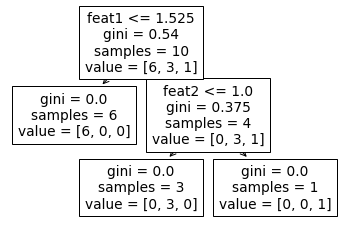

In [5]:
sklearn.tree.plot_tree(model, feature_names=['feat1', 'feat2']);

In [8]:
model = sklearn.tree.DecisionTreeClassifier(class_weight='balanced')
model.fit(X=data[['feat1', 'feat2']], y=data['y'])

print('Total sample count: {:.0f}'.format(overall_class_sizes.sum()))
print('\n')

print('Class weighting: "Balanced"')
overall_class_count = overall_class_sizes.size
overall_class_proportions = overall_class_sizes/overall_class_sizes.sum()
# Corresponds to n_samples / (n_classes * np.bincount(y)) in the documentation
class_weights = 1/(overall_class_count*overall_class_proportions)

node_class_sizes = overall_class_sizes
compute_node_impurity(class_sizes=node_class_sizes, criterion=gini, class_weights=class_weights)
node_class_sizes = np.array([0.0, 3.0, 1.0])
compute_node_impurity(class_sizes=node_class_sizes, criterion=gini, class_weights=class_weights);

Total sample count: 10


Class weighting: "Balanced"
----------------------------
Node sample count: 10
Node class sizes: [6. 3. 1.]
Node class weights: [0.55555556 1.11111111 3.33333333]
Node weighted class sizes: [3.33333333 3.33333333 3.33333333]
Node weighted class proportions: [0.33333333 0.33333333 0.33333333]
Gini Index: 0.667
----------------------------
Node sample count: 4
Node class sizes: [0. 3. 1.]
Node class weights: [0.55555556 1.11111111 3.33333333]
Node weighted class sizes: [0.         3.33333333 3.33333333]
Node weighted class proportions: [0.  0.5 0.5]
Gini Index: 0.500


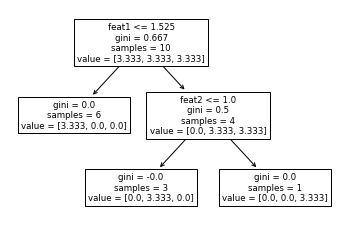

In [10]:
sklearn.tree.plot_tree(model, feature_names=['feat1', 'feat2']);

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

In [3]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [4]:
ccp_alphas

array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
       0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
       0.02314163, 0.03422475, 0.32729844])

In [5]:
impurities

array([0.        , 0.00453294, 0.01847522, 0.02313502, 0.02876883,
       0.03581108, 0.04365302, 0.05276704, 0.0642107 , 0.0831987 ,
       0.10634033, 0.14056508, 0.46786352])

In [18]:
clf.tree_.

1

Le minimal cost-complexity pruning (CCP) est un algorithme de Breiman et al. (1984) et disponible pour tous les *tree-based algorithms* de `sklearn` depuis la version 0.22.

L'algorithme CCP est un algorithme de *post-pruning*: on fait d'abord croître l'arbre avec éventuellement des contraintes de *pre-pruning*/de nature à régulariser sa croissance, cet arbre noté $T_0$ constituant l'input de l'algorithme CCP. Ce dernier ensuite va chercher le sous-arbre $T_{\alpha}$ de $T_0$ qui minimise la fonction $C_{\alpha}$:

$$C_{\alpha}(T) = R(T) + \alpha.|T|$$

Où $T$ est un sous-arbre de $T_0$, $R(T)$ une mesure de la *goodness-of-fit* sur le *dataset* (métrique de régression, en classification: *misclassification rate* ou somme pondérée des impuretés sur l'ensemble des noeuds terminaux), $|T|$ le nombre de noeuds terminaux (feuilles) de $T$ et $\alpha$ un paramètre de régularisation exprimant le compromis entre la *goodness-of-fit* et la complexité de l'arbre approximée par son nombre de feuilles. Aux extrêmes:
* Si $\alpha=0$, alors on ne pénalise pas la complexité, le *pruning* n'apporte rien puisque $T_{\alpha}=T_0$ (plus complexe, $T_0$ aura toujours une meilleure erreur $R(T)$ que n'importe lequel de ses sous-arbres).
* Si $\alpha$ est très grand, alors on pénalise tellement la complexité et élague tellement qu'$T_{\alpha}$ correspond au seul *root node*: on a un arbre à un seul noeud et de profondeur $0$ (en régression il retourne toujours la valeur moyenne sur le *training set*, en classification la classe majoritaire du *training set*).

Une fois indexés tous les noeuds non-terminaux de $T_0$, $T_t$ est défini comme le sous-arbre dont le *root node* est le noeud $t$. Examinons d'abord à quelle condition retirer le sous-arbre $T_t$ (c'est-à-dire le réduire à son *root node* $t$) de $T_0$ fait décroitre $C_\alpha$.

$$
\begin{aligned}
C_{\alpha}(T_0-T_t)- C_{\alpha}(T_0) < 0 &\Leftrightarrow R(T_0-T_t)- R(T_0) + \alpha(|T_0-T_t|-|T_0|) \lt 0 \\
&\Leftrightarrow R(T_0) - R(T_t) + R(t) - R(T_0) + \alpha(|T_0|-|T_t|+1-|T_0|) \lt 0 \\
&\Leftrightarrow R(t) - R(T_t) - \alpha(|T_t|-1) \lt 0 \\
&\Leftrightarrow \frac{R(t) - R(T_t)}{|T_t|-1} \lt \alpha \\
\end{aligned}
$$

On remarque que $R(t) - R(T_t)$ correspond à la dégradation de la *goodness-of-fit* impliquée par le fait de remplacer $T_t$ par son *root node* $t$ (c'est-à-dire d'élaguer $T_0$ de $T_t$) et $|T_t|-1$ correspond au nombre de noeuds perdus lors de l'opération. Le ratio des deux quantités est parfois appelé $\alpha$ effectif ou $\alpha_{eff}$. Ainsi l'$\alpha_{eff\ t}$ d'un noeud non terminal $t$ correspond à augmentation de la *loss* par nombre de noeud supprimé qu'occasionne l'élaguage de $T_t$. Quand on doit choisir entre plusieurs candidats pour lesquels $\alpha_{eff}<\alpha$, on prend alors logiquement celui pour lequel $\alpha_{eff}$ est le plus faible. On parle de *weakest link pruning*.

On peut ainsi définir un *pruning path* qui correspond à une suite d'arbre $T_i^*$ allant de $T_0^*=T_0$ à son *root node* $root$, chaque arbre étant déduit du précédent en l'élaguant de son *weakest link*. 

Remarque: le *pruning path* ne comprend pas forcément autant d'éléments que $T_0$ a de noeuds non-terminaux. Le *weakest link* d'une étape donnée peut comporter plus d'un noeud non-terminal. Dit autrement, le *weakest link pruning* ne correspond pas forcément à un élaguage de $T_0$ un noeud après l'autre.

A ce *pruning path* correspond une suite de coefficients $\alpha_{eff\ i}$ correspondant à l'$\alpha_{eff}$ du *weakest link* de $T_{i-1}^*$ ($\alpha_0=0$).

Remarque: pour chaque arbre du *pruning path*, on doit calculer tous ses $\alpha_{eff}$, son $\alpha_{eff\ i}$ correspondant à la plus petite valeur obtenue.

On peut montrer que pour tout $i$, $T_i^*$ est le plus petit arbre minimisant $C_{\alpha}$ pour tout $\alpha$ tel que $\alpha_{eff\ i} \leq \alpha \lt \alpha_{eff\ i+1}$. Le *pruning path* correspond donc (à un jeu de données et) à l'ensemble des *arbres* pouvant être obtenu par cette méthode pour tous les $\alpha \geq 0$.

La construction du *pruning path* et sa liste d'$\alpha_{eff}$ associée nous aide dans le choix d'$\alpha$ qui est finalement un hyperparamètre du modèle. A ce titre, son choix doit faire l'objet d'une cross-validation, le meilleur $\hat{\alpha}$ finalement choisi étant celui qui minimise la *cross-validated validation loss*.

On procède souvent comme suit: 
* On divise le *dataset* en *training* et *test sets*. 
* On commence par construire le *pruning path* et sa liste d'$\alpha_{eff}$ associée sur la totalité du *training set*.
* Pour chaque intervalle $[\alpha_{eff\ i}, \alpha_{eff\ i+1}[$, on prend une valeur candidate $\alpha_i'$ à l'intérieur (par exemple $\alpha_i' = \sqrt{\alpha_{eff\ i}.\alpha_{eff\ i+1}}$) et évalue par cross-validation les métriques du modèle élagué avec $\alpha=\alpha_i'$ sur le *training* qui est divisé en $k$ *folds*.
* On sélectionne le modèle et donc le $\alpha_i'$ qui minimise la *validation loss*.

In [19]:
clfs = []
for i, ccp_alpha in enumerate(ccp_alphas):
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    print(f"Tree #{i} | CCP alpha: {ccp_alpha} | Tree node count: {clf.tree_.node_count} ({clf.tree_.n_leaves} leaves) | Tree max depth: {clf.tree_.max_depth}")

Tree #0 | CCP alpha: 0.0 | Tree node count: 31 (16 leaves) | Tree max depth: 8
Tree #1 | CCP alpha: 0.0022664723976040134 | Tree node count: 27 (14 leaves) | Tree max depth: 6
Tree #2 | CCP alpha: 0.004647426339100881 | Tree node count: 21 (11 leaves) | Tree max depth: 4
Tree #3 | CCP alpha: 0.004659799593581376 | Tree node count: 19 (10 leaves) | Tree max depth: 4
Tree #4 | CCP alpha: 0.005633802816901408 | Tree node count: 17 (9 leaves) | Tree max depth: 4
Tree #5 | CCP alpha: 0.007042253521126761 | Tree node count: 15 (8 leaves) | Tree max depth: 4
Tree #6 | CCP alpha: 0.007841938420144537 | Tree node count: 13 (7 leaves) | Tree max depth: 4
Tree #7 | CCP alpha: 0.009114019793328328 | Tree node count: 11 (6 leaves) | Tree max depth: 4
Tree #8 | CCP alpha: 0.011443661971830986 | Tree node count: 9 (5 leaves) | Tree max depth: 3
Tree #9 | CCP alpha: 0.018988002086593604 | Tree node count: 7 (4 leaves) | Tree max depth: 3
Tree #10 | CCP alpha: 0.023141627543035996 | Tree node count: 5 

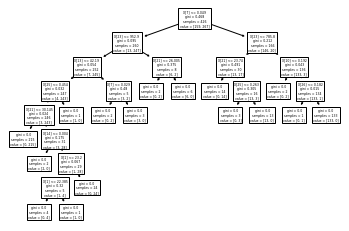

In [14]:
sklearn.tree.plot_tree(clfs[0]);

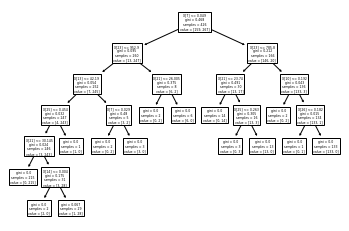

In [15]:
sklearn.tree.plot_tree(clfs[1]);

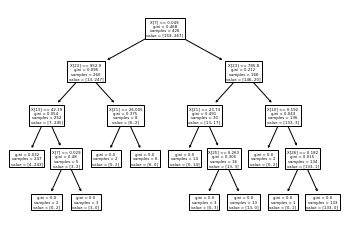

In [21]:
sklearn.tree.plot_tree(clfs[2]);

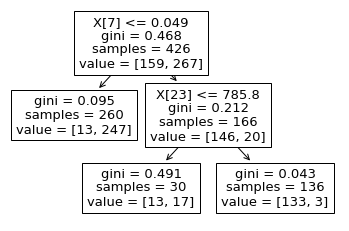

In [20]:
sklearn.tree.plot_tree(clfs[10]);

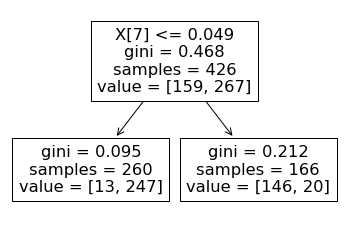

In [16]:
sklearn.tree.plot_tree(clfs[11]);

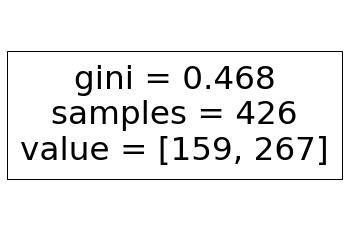

In [17]:
sklearn.tree.plot_tree(clfs[12]);